<a href="https://colab.research.google.com/github/AntonySharon/Data-Visualization-and-Communication/blob/main/DVC_Python_3_ASB_Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#load the necessary liraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('ASB-sales-data.csv',parse_dates=['Order_Date']) # parsedate is used for date operations

In [4]:
df.head()

,Order_ID,Region,Category,Salesperson,Units_Sold,Unit_Price,Discount,Order_Date,Sales_Amount
0,ORD1000,East,Electronics,Employee_8,NaN,393.99,0.25,2023-01-01,11819.7000
1,ORD1001,West,Groceries,Employee_1,42.0,204.31,0.04,2023-01-02,8237.7792
2,ORD1002,North,Books,Employee_9,9.0,314.82,0.12,2023-01-03,2493.3744
3,ORD1003,East,Groceries,Employee_11,27.0,432.56,0.24,2023-01-04,8876.1312
4,ORD1004,East,Books,Employee_16,2.0,475.27,0.04,2023-01-05,912.5184


In [5]:
df.dtypes

,0
Order_ID,object
Region,object
Category,object
Salesperson,object
Units_Sold,float64
Unit_Price,float64
Discount,float64
Order_Date,datetime64[ns]
Sales_Amount,float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order_ID      200 non-null    object        
 1   Region        200 non-null    object        
 2   Category      200 non-null    object        
 3   Salesperson   200 non-null    object        
 4   Units_Sold    190 non-null    float64       
 5   Unit_Price    190 non-null    float64       
 6   Discount      190 non-null    float64       
 7   Order_Date    200 non-null    datetime64[ns]
 8   Sales_Amount  200 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 14.2+ KB


In [7]:
df.describe() # for all columns

,Units_Sold,Unit_Price,Discount,Order_Date,Sales_Amount
count,190.000000,190.000000,190.000000,200,200.000000
mean,24.789474,240.546211,0.143368,2023-04-10 12:00:00,4917.998540
min,1.000000,19.830000,0.000000,2023-01-01 00:00:00,116.353200
25%,13.000000,124.395000,0.070000,2023-02-19 18:00:00,1552.046100
50%,26.000000,235.380000,0.140000,2023-04-10 12:00:00,3530.548900
75%,37.000000,356.727500,0.210000,2023-05-30 06:00:00,7300.579875
max,49.000000,495.080000,0.300000,2023-07-19 00:00:00,21472.869000
std,14.272032,137.366886,0.085537,NaN,4442.687204


In [8]:
df["Discount"].describe() #for one column only

,Discount
count,190.000000
mean,0.143368
std,0.085537
min,0.000000
25%,0.070000
50%,0.140000
75%,0.210000
max,0.300000


In [9]:
df.isna().sum()

,0
Order_ID,0
Region,0
Category,0
Salesperson,0
Units_Sold,10
Unit_Price,10
Discount,10
Order_Date,0
Sales_Amount,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
#if duplicate values are there (order ID: supposed to be unique)
# then we have to delete those duplicate rows
if 'Order_ID' in df.columns:
  before=df.shape[0]
  df=df.drop_duplicates(subset=["Order_ID"],keep='first')
  after=df.shape[0]
  print(f'Dropped {before-after} duplicate rows by Order_ID')
else:
  print('No duplicate Order_ID found, skipped the duplicate removal')

Dropped 0 duplicate rows by Order_ID


In [12]:
df['Units_Sold'].median()

np.float64(26.0)

In [13]:
df['Unit_Price'].median()

np.float64(235.38)

In [14]:
df['Unit_Price'].mean()

np.float64(240.54621052631578)

In [15]:
df['Discount'].median()

np.float64(0.14)

In [16]:
numeric_cols=['Units_Sold','Unit_Price',"Discount"]
for c in numeric_cols:
  if c in df.columns:
    median_value=df[c].median()
    df[c]=df[c].fillna(median_value)

In [17]:
df.isnull().sum()

,0
Order_ID,0
Region,0
Category,0
Salesperson,0
Units_Sold,0
Unit_Price,0
Discount,0
Order_Date,0
Sales_Amount,0


In [18]:
df.head(3)

,Order_ID,Region,Category,Salesperson,Units_Sold,Unit_Price,Discount,Order_Date,Sales_Amount
0,ORD1000,East,Electronics,Employee_8,26.0,393.99,0.25,2023-01-01,11819.7000
1,ORD1001,West,Groceries,Employee_1,42.0,204.31,0.04,2023-01-02,8237.7792
2,ORD1002,North,Books,Employee_9,9.0,314.82,0.12,2023-01-03,2493.3744


In [19]:
# re calculate sales column to make error free
# recompute the sales column for consistency
if set(['Units_Sold','Unit_Price','Discount']).issubset(df.columns):
  df['Sales_amt_recalc'] = df['Units_Sold']*df['Unit_Price']*(1-df['Discount'])
  if 'Sales_Amount' not in df.columns:
    df['Sales_Amount'] = df['Sales_amt_recalc']
else:
    print('Missing a required column:Error')

In [20]:
df.head()

,Order_ID,Region,Category,Salesperson,Units_Sold,Unit_Price,Discount,Order_Date,Sales_Amount,Sales_amt_recalc
0,ORD1000,East,Electronics,Employee_8,26.0,393.99,0.25,2023-01-01,11819.7000,7682.8050
1,ORD1001,West,Groceries,Employee_1,42.0,204.31,0.04,2023-01-02,8237.7792,8237.7792
2,ORD1002,North,Books,Employee_9,9.0,314.82,0.12,2023-01-03,2493.3744,2493.3744
3,ORD1003,East,Groceries,Employee_11,27.0,432.56,0.24,2023-01-04,8876.1312,8876.1312
4,ORD1004,East,Books,Employee_16,2.0,475.27,0.04,2023-01-05,912.5184,912.5184


# Feature Engineering
# Adding time based Features


In [21]:
if 'Order_Date' in df.columns:
  df['Year']=df['Order_Date'].dt.year
  df['Month']=df['Order_Date'].dt.month
  df['Quarter']=df['Order_Date'].dt.to_period('Q').astype(str)
else:
  print("No Order_Date column - skipping the time features")

In [22]:
df.head(3)

,Order_ID,Region,Category,Salesperson,Units_Sold,Unit_Price,Discount,Order_Date,Sales_Amount,Sales_amt_recalc,Year,Month,Quarter
0,ORD1000,East,Electronics,Employee_8,26.0,393.99,0.25,2023-01-01,11819.7000,7682.8050,2023,1,2023Q1
1,ORD1001,West,Groceries,Employee_1,42.0,204.31,0.04,2023-01-02,8237.7792,8237.7792,2023,1,2023Q1
2,ORD1002,North,Books,Employee_9,9.0,314.82,0.12,2023-01-03,2493.3744,2493.3744,2023,1,2023Q1


In [23]:
# profit estimate
if 'Sales_amt_recalc' in df.columns:
  df['Profit_Estimate']=df['Sales_amt_recalc']*0.20

df.head()

,Order_ID,Region,Category,Salesperson,Units_Sold,Unit_Price,Discount,Order_Date,Sales_Amount,Sales_amt_recalc,Year,Month,Quarter,Profit_Estimate
0,ORD1000,East,Electronics,Employee_8,26.0,393.99,0.25,2023-01-01,11819.7000,7682.8050,2023,1,2023Q1,1536.56100
1,ORD1001,West,Groceries,Employee_1,42.0,204.31,0.04,2023-01-02,8237.7792,8237.7792,2023,1,2023Q1,1647.55584
2,ORD1002,North,Books,Employee_9,9.0,314.82,0.12,2023-01-03,2493.3744,2493.3744,2023,1,2023Q1,498.67488
3,ORD1003,East,Groceries,Employee_11,27.0,432.56,0.24,2023-01-04,8876.1312,8876.1312,2023,1,2023Q1,1775.22624
4,ORD1004,East,Books,Employee_16,2.0,475.27,0.04,2023-01-05,912.5184,912.5184,2023,1,2023Q1,182.50368


In [24]:
#df.drop("Sales_Amount",index=1)

In [25]:
# Saving this dataframe as a new CSV or Excel File
clean_path=("Cleaned_ASB_Sales_Data.csv")
df.to_csv(clean_path,index=False)

## Visualization

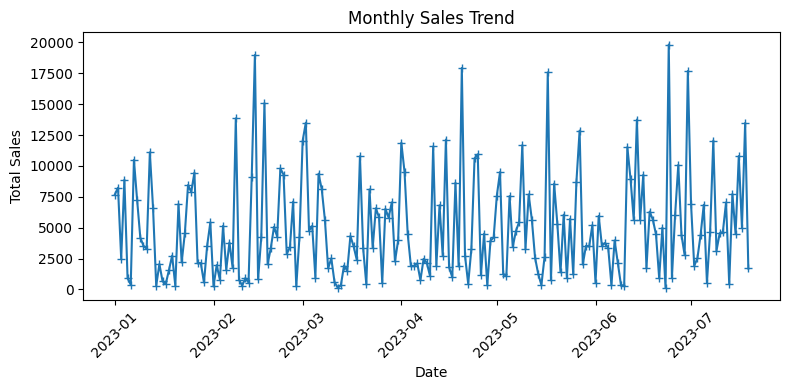

In [26]:
#1 Monthly Sales Trend
# To know how total sales are evolving month to month
monthly=df.groupby('Order_Date', as_index=False)['Sales_amt_recalc'].sum()
plt.figure(figsize=(8,4))
plt.plot(monthly['Order_Date'],monthly["Sales_amt_recalc"],marker='+')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

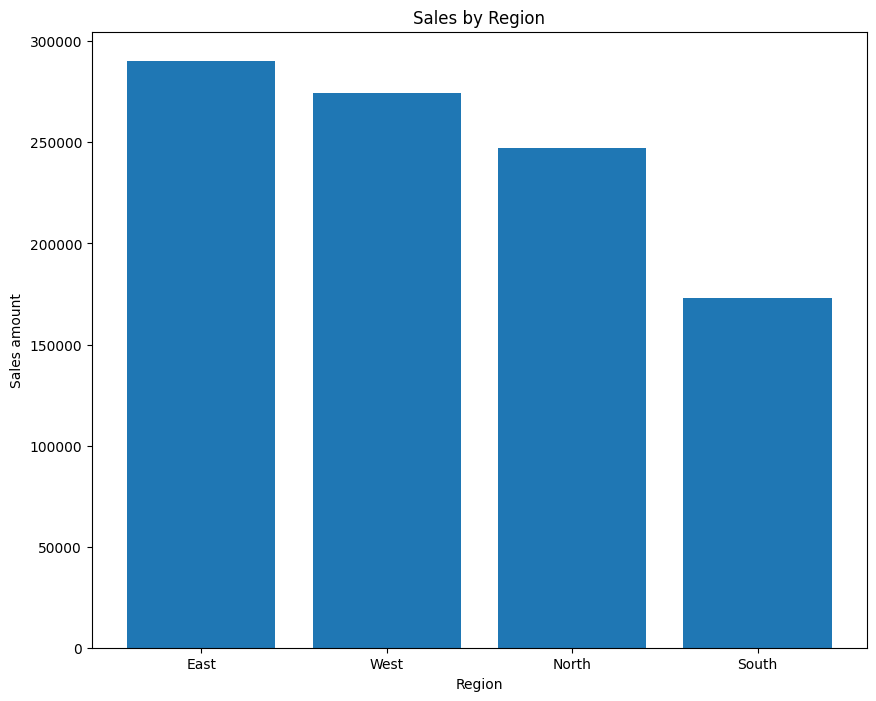

In [27]:
#2 Bar Chart
#Sales by region
#Which region contributes most revenue??
#Create a variable
by_region=df.groupby("Region",as_index=False)['Sales_amt_recalc'].sum().sort_values('Sales_amt_recalc',ascending=False)
plt.figure(figsize=(10,8))
plt.bar(by_region['Region'],by_region['Sales_amt_recalc'])
plt.title("Sales by Region")
plt.xlabel('Region')
plt.ylabel('Sales amount')
plt.show()

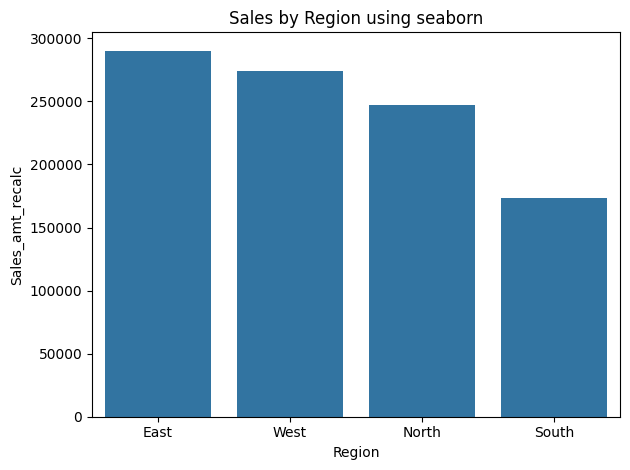

In [28]:
#creating the same bar chart using seaborn
sns.barplot(data=by_region,
            x='Region',y='Sales_amt_recalc')
plt.title("Sales by Region using seaborn")
plt.tight_layout()
plt.show()

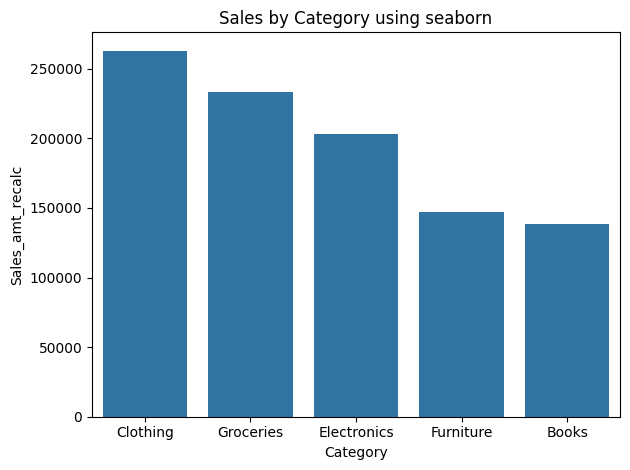

In [29]:
#3 Sales by category (bar plot)
#which category has the maximum sales?
by_category=df.groupby("Category",as_index=False)['Sales_amt_recalc'].sum().sort_values('Sales_amt_recalc',ascending=False)
sns.barplot(data=by_category,
            x='Category',y='Sales_amt_recalc')
plt.title("Sales by Category using seaborn")
plt.tight_layout()
plt.show()

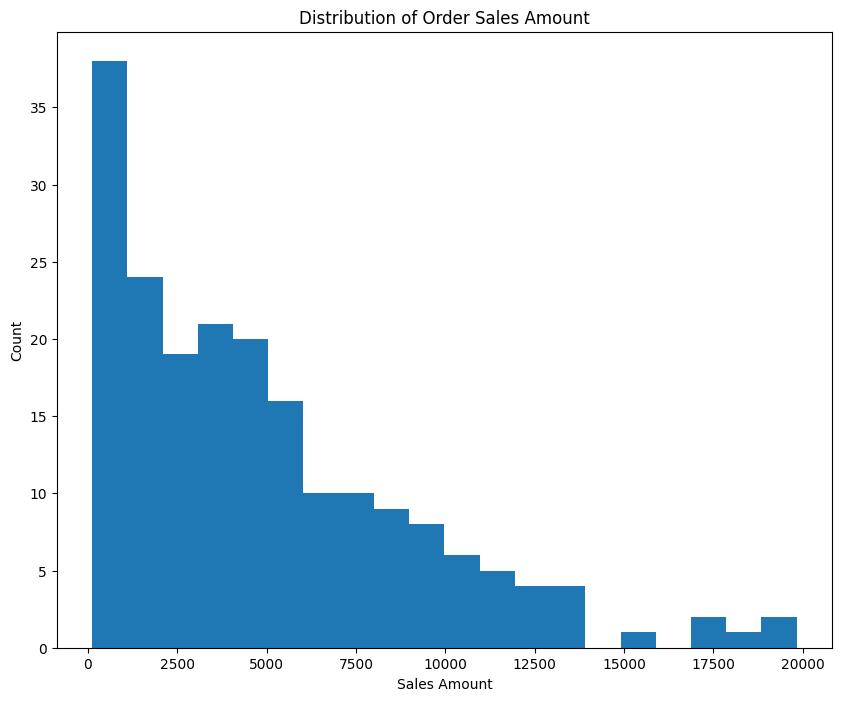

In [30]:
#4 Distribution of transaction sizes
#Histogram
# what does the distribution of individual order values look like?
plt.figure(figsize=(10,8))
plt.hist(df['Sales_amt_recalc'],bins=20)
plt.title('Distribution of Order Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Count')
plt.show()

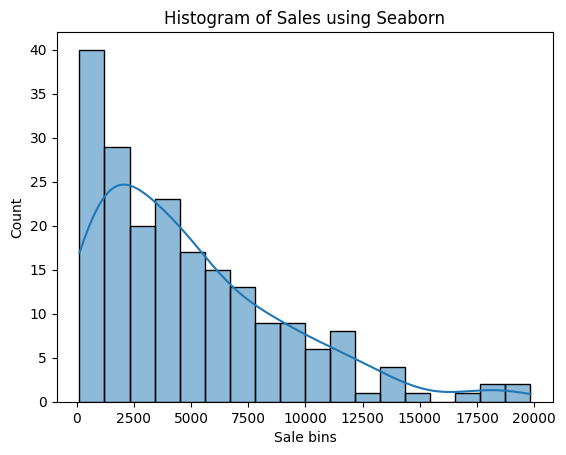

In [31]:
# Same histogram using seaborn
sns.histplot(x=df['Sales_amt_recalc'],
             bins=18, kde=True) # kernel density estimated value
plt.title('Histogram of Sales using Seaborn')
plt.xlabel('Sale bins')
plt.show()

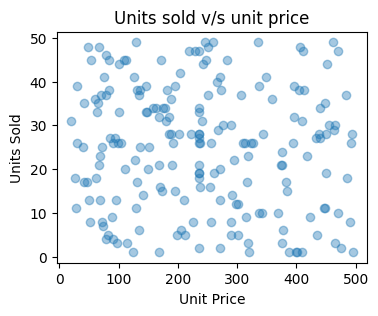

In [32]:
# 5. Scatter plot
# Units sold v/s unit price
# are higher priced items sold in smaller quantities?
plt.figure(figsize=(4,3))
plt.scatter(df['Unit_Price'],df['Units_Sold'],alpha=0.4)
plt.title('Units sold v/s unit price')
plt.xlabel("Unit Price")
plt.ylabel("Units Sold")
plt.show()

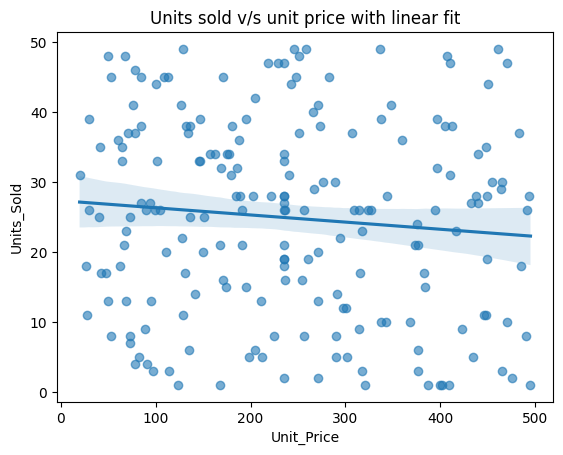

In [33]:
# Creating the same scatter plot using seaborn
sns.regplot(data= df,x='Unit_Price',
            y='Units_Sold', scatter_kws={'alpha':0.6})
plt.title('Units sold v/s unit price with linear fit')
plt.show()

In [34]:
df.columns

Index(['Order_ID', 'Region', 'Category', 'Salesperson', 'Units_Sold',
       'Unit_Price', 'Discount', 'Order_Date', 'Sales_Amount',
       'Sales_amt_recalc', 'Year', 'Month', 'Quarter', 'Profit_Estimate'],
      dtype='object')

In [35]:
df.corr(numeric_only=True)

,Units_Sold,Unit_Price,Discount,Sales_Amount,Sales_amt_recalc,Year,Month,Profit_Estimate
Units_Sold,1.000000,-0.098281,0.164208,0.602966,0.633099,NaN,0.024408,0.633099
Unit_Price,-0.098281,1.000000,-0.004377,0.587016,0.591558,NaN,0.113689,0.591558
Discount,0.164208,-0.004377,1.000000,-0.025332,-0.032348,NaN,-0.089707,-0.032348
Sales_Amount,0.602966,0.587016,-0.025332,1.000000,0.967438,NaN,0.069894,0.967438
Sales_amt_recalc,0.633099,0.591558,-0.032348,0.967438,1.000000,NaN,0.087291,1.000000
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.024408,0.113689,-0.089707,0.069894,0.087291,NaN,1.000000,0.087291
Profit_Estimate,0.633099,0.591558,-0.032348,0.967438,1.000000,NaN,0.087291,1.000000


In [36]:
# 6 Correlation Heatmap (matrix)
# To know which numerical variables moves together
num_cols=['Units_Sold','Unit_Price','Discount','Sales_amt_recalc','Profit_Estimate']
# creating a variable to identify these column in the main df
available= [c for c in num_cols if c in df.columns]
corr=df[available].corr()
corr

,Units_Sold,Unit_Price,Discount,Sales_amt_recalc,Profit_Estimate
Units_Sold,1.000000,-0.098281,0.164208,0.633099,0.633099
Unit_Price,-0.098281,1.000000,-0.004377,0.591558,0.591558
Discount,0.164208,-0.004377,1.000000,-0.032348,-0.032348
Sales_amt_recalc,0.633099,0.591558,-0.032348,1.000000,1.000000
Profit_Estimate,0.633099,0.591558,-0.032348,1.000000,1.000000


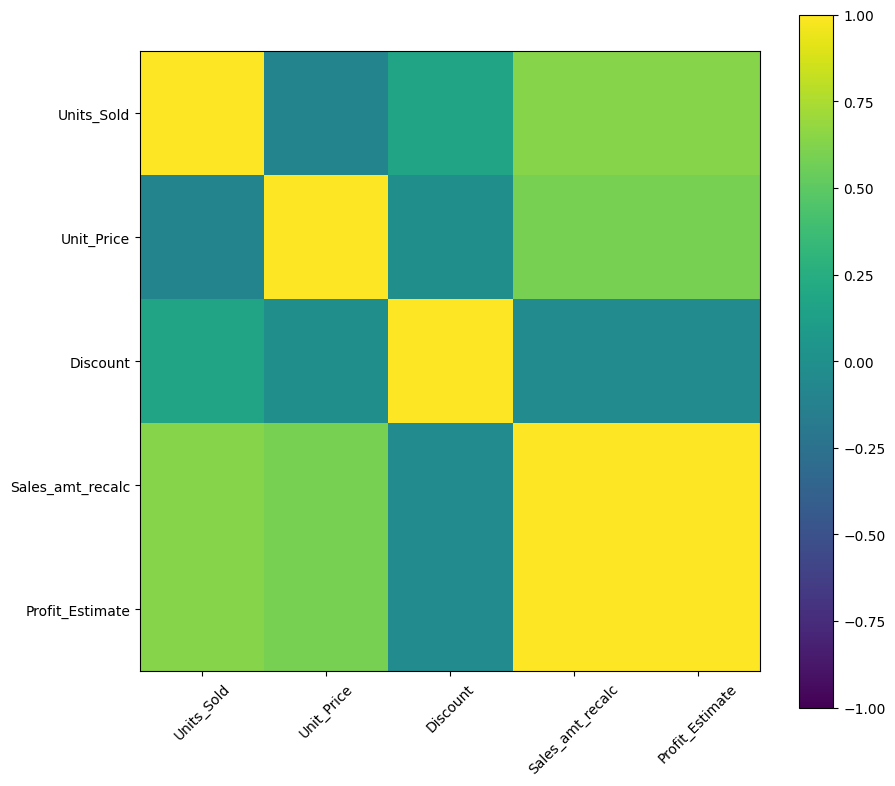

In [37]:
#converting the corr to heatmap matrix
plt.figure(figsize=(10,9))
plt.imshow(corr,cmap='viridis',vmin=-1,vmax=1)
plt.xticks(range(len(available)),available,rotation=45)
plt.yticks(range(len(available)),available)
plt.colorbar()
plt.show()

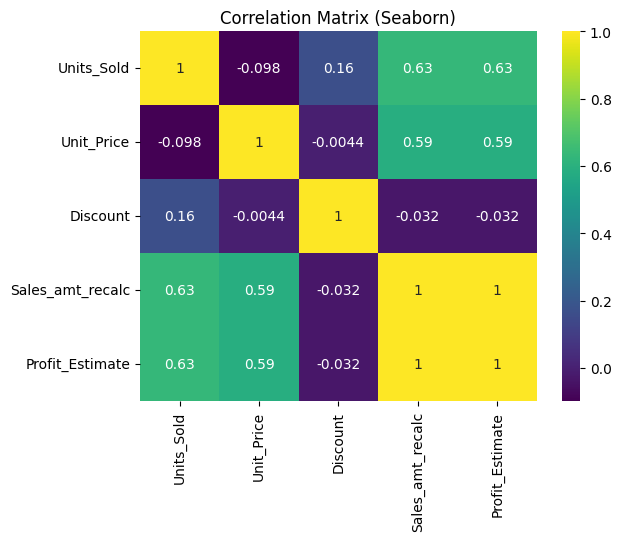

In [38]:
# heatmap with seaborn
sns.heatmap(corr,annot=True,cmap='viridis')
plt.title('Correlation Matrix (Seaborn)')
plt.show()

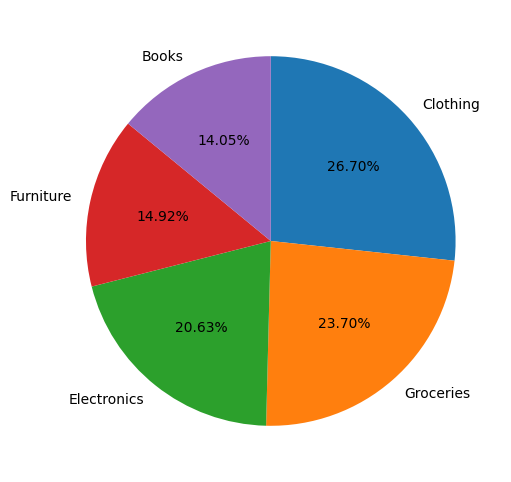

In [41]:
# category share of revenue using pie chart
# what portion of total revenue comes from each category?
# first create a variable
shares= by_category.set_index("Category")['Sales_amt_recalc']
plt.figure(figsize=(8,6))
plt.pie(shares,labels=shares.index, autopct='%1.2f%%',startangle=90,counterclock=False)
plt.show()